In [1]:
import pandas as pd
from bs4 import BeautifulSoup 
import re
import nltk
import numpy as np

from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('data/IMDBMovieReview.tsv',header=0,delimiter='\t',quoting=3)

In [3]:
print("Number of Examples in dataset: %d"%dataset.shape[0])
print("Dataset keys : %s"%dataset.columns.values)

Number of Examples in dataset: 25000
Dataset keys : ['id' 'sentiment' 'review']


<h1 align='center'> Removing HTML Tags </h1>

In [4]:
dataset['review'][0]

'"With all this stuff going down at the moment with MJ i\'ve started listening to his music, watching the odd documentary here and there, watched The Wiz and watched Moonwalker again. Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent. Moonwalker is part biography, part feature film which i remember going to see at the cinema when it was originally released. Some of it has subtle messages about MJ\'s feeling towards the press and also the obvious message of drugs are bad m\'kay.<br /><br />Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyway then you are going to hate this and find it boring. Some may call MJ an egotist for consenting to the making of this movie BUT MJ and most of his fans would say that he made it for the fans which if true is really nice of him.<br /><br />The actual feature film bit when it finally

In [5]:
example1 = BeautifulSoup(dataset['review'][0],"lxml")
print(example1.get_text())

"With all this stuff going down at the moment with MJ i've started listening to his music, watching the odd documentary here and there, watched The Wiz and watched Moonwalker again. Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent. Moonwalker is part biography, part feature film which i remember going to see at the cinema when it was originally released. Some of it has subtle messages about MJ's feeling towards the press and also the obvious message of drugs are bad m'kay.Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyway then you are going to hate this and find it boring. Some may call MJ an egotist for consenting to the making of this movie BUT MJ and most of his fans would say that he made it for the fans which if true is really nice of him.The actual feature film bit when it finally starts is only on for 20 mi

<h1 align="center"> Removing Punctuations </h1>

In [6]:
letters_only = re.sub("[^a-zA-Z]", " ", example1.get_text() )  
print(letters_only)

 With all this stuff going down at the moment with MJ i ve started listening to his music  watching the odd documentary here and there  watched The Wiz and watched Moonwalker again  Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent  Moonwalker is part biography  part feature film which i remember going to see at the cinema when it was originally released  Some of it has subtle messages about MJ s feeling towards the press and also the obvious message of drugs are bad m kay Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyway then you are going to hate this and find it boring  Some may call MJ an egotist for consenting to the making of this movie BUT MJ and most of his fans would say that he made it for the fans which if true is really nice of him The actual feature film bit when it finally starts is only on for    mi

<h1 align = "center" > Removing StopWords </h1>

In [7]:
lower_case = letters_only.lower()
words = lower_case.split()

In [8]:
print(stopwords.words("english"))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [9]:
words = [w for w in words if not w in stopwords.words("english")]
print(words)

['stuff', 'going', 'moment', 'mj', 'started', 'listening', 'music', 'watching', 'odd', 'documentary', 'watched', 'wiz', 'watched', 'moonwalker', 'maybe', 'want', 'get', 'certain', 'insight', 'guy', 'thought', 'really', 'cool', 'eighties', 'maybe', 'make', 'mind', 'whether', 'guilty', 'innocent', 'moonwalker', 'part', 'biography', 'part', 'feature', 'film', 'remember', 'going', 'see', 'cinema', 'originally', 'released', 'subtle', 'messages', 'mj', 'feeling', 'towards', 'press', 'also', 'obvious', 'message', 'drugs', 'bad', 'kay', 'visually', 'impressive', 'course', 'michael', 'jackson', 'unless', 'remotely', 'like', 'mj', 'anyway', 'going', 'hate', 'find', 'boring', 'may', 'call', 'mj', 'egotist', 'consenting', 'making', 'movie', 'mj', 'fans', 'would', 'say', 'made', 'fans', 'true', 'really', 'nice', 'actual', 'feature', 'film', 'bit', 'finally', 'starts', 'minutes', 'excluding', 'smooth', 'criminal', 'sequence', 'joe', 'pesci', 'convincing', 'psychopathic', 'powerful', 'drug', 'lord', 

<h1 align="center"> Putting all the Preprocessing Together </h1>

In [10]:
def preprocessReview(review):
    
    reviewWithoutTags = BeautifulSoup(review,"lxml").get_text() 
    
    lettersOnly = re.sub("[^a-zA-Z]", " ", reviewWithoutTags)
    
    words = lettersOnly.lower().split() 
    
    stops = set(stopwords.words("english"))  
    meaningfulWords = [w for w in words if not w in stops] 
    
    return( " ".join( meaningfulWords )) 

In [11]:
clean_review = preprocessReview( dataset["review"][0] )
print(clean_review)

stuff going moment mj started listening music watching odd documentary watched wiz watched moonwalker maybe want get certain insight guy thought really cool eighties maybe make mind whether guilty innocent moonwalker part biography part feature film remember going see cinema originally released subtle messages mj feeling towards press also obvious message drugs bad kay visually impressive course michael jackson unless remotely like mj anyway going hate find boring may call mj egotist consenting making movie mj fans would say made fans true really nice actual feature film bit finally starts minutes excluding smooth criminal sequence joe pesci convincing psychopathic powerful drug lord wants mj dead bad beyond mj overheard plans nah joe pesci character ranted wanted people know supplying drugs etc dunno maybe hates mj music lots cool things like mj turning car robot whole speed demon sequence also director must patience saint came filming kiddy bad sequence usually directors hate working

In [12]:
preprocessedDataset = []
for i in range(dataset['review'].size):
    if( (i+1)%1000 == 0 ):
        print("Preprocessing Review %d of %d"%(i+1,dataset['review'].size))
    preprocessedDataset.append(preprocessReview(dataset['review'][i]))

Preprocessing Review 1000 of 25000
Preprocessing Review 2000 of 25000
Preprocessing Review 3000 of 25000
Preprocessing Review 4000 of 25000
Preprocessing Review 5000 of 25000
Preprocessing Review 6000 of 25000
Preprocessing Review 7000 of 25000
Preprocessing Review 8000 of 25000
Preprocessing Review 9000 of 25000
Preprocessing Review 10000 of 25000
Preprocessing Review 11000 of 25000
Preprocessing Review 12000 of 25000
Preprocessing Review 13000 of 25000
Preprocessing Review 14000 of 25000
Preprocessing Review 15000 of 25000
Preprocessing Review 16000 of 25000
Preprocessing Review 17000 of 25000
Preprocessing Review 18000 of 25000
Preprocessing Review 19000 of 25000
Preprocessing Review 20000 of 25000
Preprocessing Review 21000 of 25000
Preprocessing Review 22000 of 25000
Preprocessing Review 23000 of 25000
Preprocessing Review 24000 of 25000
Preprocessing Review 25000 of 25000


In [13]:
len(preprocessedDataset)

25000

<h1 align="center"> Creating Bag of Words Model </h1>

In [14]:
vectorizer = CountVectorizer(analyzer="word", tokenizer=None, preprocessor=None, stop_words=None, max_features=5000)
vectorizer.fit(preprocessedDataset)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=5000, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [15]:
BOWDataset = vectorizer.transform(preprocessedDataset).toarray()

In [16]:
print("Dataset Features : %d"%BOWDataset.shape[1])

Dataset Features : 5000


<h1 align="center"> Data Analysis </h1>

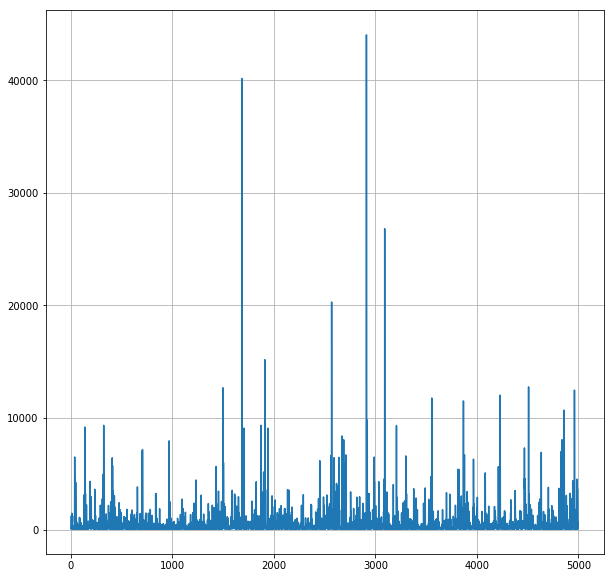

In [17]:
# Word count of various word features in dataset

%matplotlib inline
dist = np.sum(BOWDataset, axis=0)

# For each, print the vocabulary word and the number of times it 
# appears in the training set

plt.figure(figsize=(10,10))
plt.plot(dist)
plt.grid()

#for tag, count in zip(vocab, dist):
#    print(count, tag)

<h1 align="center"> Training Random Forest Classifier </h1>

In [18]:
# Creating Training and testing data
xTrainData = BOWDataset[:20000,:]
yTrainData = dataset["sentiment"][0:20000]

xTestData  = BOWDataset[20000:,:]
yTestData  = dataset["sentiment"][20000:]

In [19]:
# Initialize a Random Forest classifier with 100 trees
forest = RandomForestClassifier(n_estimators = 100) 
forest = forest.fit( xTrainData, yTrainData )

<h1 align="center"> Testing Stage </h1>

In [20]:
score = forest.score(xTestData,yTestData)
print("Accuracy at test Stage : %f"%score)

Accuracy at test Stage : 0.846200


# A very simple Bag Of Word Model based method is able to achieve accuracy > 80%